<img style="float:right; width:20%" src="logogach.png" />

# Modelos dinámicos de epidemias.


## Aportes a la comprensión de la pandemia de COVID-19


### Andrés Ferragut
### Universidad ORT Uruguay y GACH - Área Datos

## Agenda

1. Describir algunos modelos idealizados de evolución epidémica.

2. Incorporar aspectos particulares de *mitigación* en los modelos.

3. Realizar un análisis cualitativo para la definción de estrategias.


## El modelo SIR

Este es el modelo clásico de epidemia. Se tiene una población de tamaño $N$ que puede estar en tres *compartimentos*:

* $S$: susceptibles de ser infectados.
* $I$: infectados activos.
* $R$: removidos (recuperados o fallecidos)

**Evolución:**

$$S \longrightarrow I \longrightarrow R$$

**Pregunta:**

¿Con qué frecuencia se dan estas transiciones?

### Frecuencia de infección

Supongamos que en tiempo $t$ tenemos $S(t)$ susceptibles, y análogamente para $I$ y $R$. Entonces:

$$S(t+\Delta t) = S(t) - \beta \Delta t \frac{S(t)}{N} I(t).$$

Aquí:

* $\beta$ es la frecuencia (por unidad de tiempo) con que un infectado contacta (contagiosamente) a otra persona.
* $\beta \Delta t$ es entonces la cantidad de contactos de un infectado.
* $S(t)/N$ es la probabilidad de que dicho contacto haya sido con un susceptible.

### El límite de tiempo continuo:

Si tomamos la ecuación anterior y reacomodamos los términos tenemos:

$$\frac{S(t+\Delta t) - S(t)}{\Delta t} = -\beta\frac{S(t)}{N}I(t).$$

Haciendo $\Delta t \to 0$ tenemos la ecuación diferencial:

$$\dot{S} = -\beta \frac{S}{N} I,$$

donde hemos dejado implícita la dependencia del tiempo para simplificar la notación.

### Frecuencia de remoción

Razonando similar con los removidos:

$$R(t+\Delta t) = R(t) + \gamma \Delta t I(t)$$

Aquí $\gamma$ es la *frecuencia de remoción*, o bien $1/\gamma$ es la duración media del curso de la infección.

Pasando nuevamente al límite:

$$\dot{R} = \gamma I.$$

### Modelo SIR completo

Combinando las observaciones anteriores tenemos el **modelo SIR** de epidemia:

$$S \mathop{\longrightarrow}^{\beta SI/N} I \mathop{\longrightarrow}^{\gamma I} R.$$

O bien en ecuaciones:

$$\begin{align}
\dot{S} &= -\beta \frac{S}{N} I \\
\dot{I} &= \beta \frac{S}{N} I - \gamma I \\
\dot{R} &= \gamma R.
\end{align}$$



### Ejemplo (alta contagiosidad):


Tomemos como parámetros:


 * $N$ = Población de UY $\approx 3.5M$.
 
 * $I(0)$ = 1 de cada 100.000 (35 infectados iniciales).
 
 * $1/\gamma$ = duración de la enfermedad 10 días ($\gamma=0.1$).
 
 * $\beta = 0.3$, es decir, cada persona contacta contagiosamente a $\bf 3$ **personas nuevas**.

### Simulación

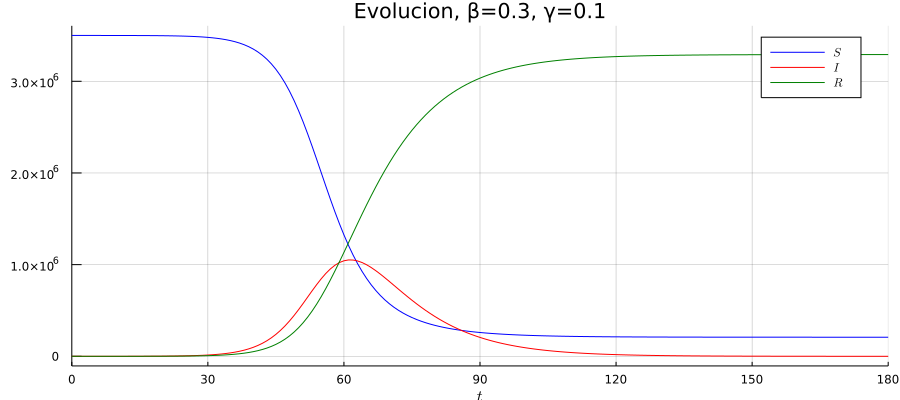

In [1]:
using OrdinaryDiffEq, Plots, LaTeXStrings
default(size=(900,400), gridalpha=0.3)
const UYPOP= 3.5e6

function sir_model!(du,u,p,t)
    beta, gamma = p
    S,I,R = u
    N=S+I+R
    
    du[1] = dS = -beta*S*I/N
    du[2] = dI = beta*S*I/N - gamma*I
    du[3] = dR = gamma*I
    
end

beta=0.3
gamma=0.1
p=[beta,gamma]
I0 = 0.00001
u0=UYPOP*[1-I0,I0,0]
Tfinal = 180.0

prob = ODEProblem(sir_model!, u0,(0,Tfinal), p)

sol=solve(prob, saveat=1)
plot(sol, label=[L"S" L"I" L"R"], color=[:blue :red :green],xlabel=L"t", title="Evolucion, β=$beta, γ=$gamma")

### Evolución de activos

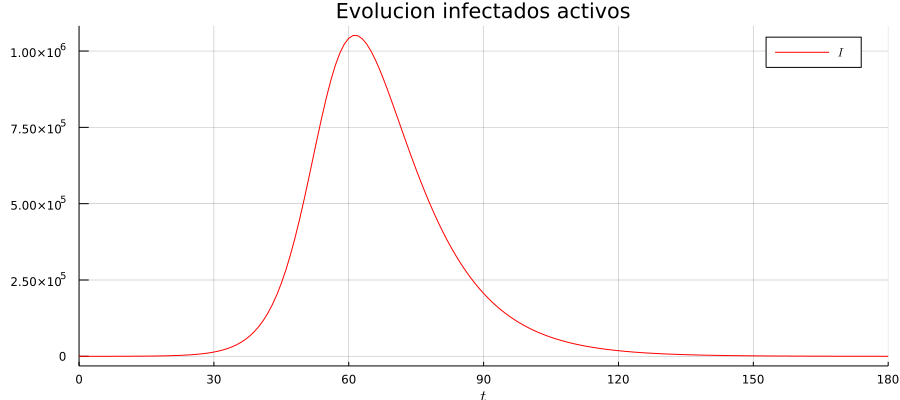

In [2]:
plot(sol,vars=2, color=:red, label=L"I", xlabel=L"t", title="Evolucion infectados activos")

* Para estos parámetros, el pico es 30% de la población enferma simultáneamente.
* Se observa que entre 1 y 2% cursa en CTI.
* **Conclusión:** si lo dejamos ir, necesitamos $\approx 16000$ camas de CTI para bancar la ola.

### Crecimiento exponencial

¿Por qué hablamos de un crecimiento exponencial de casos?

Si suponemos que $S\approx N$ (o sea, casi toda la población susceptible), la ecuación se simplifica:

$$\dot{I} = (\beta-\gamma) I,$$

cuya solución es:

$$I(t) = I(0)e^{(\beta-\gamma)t}.$$

* Si $\beta>\gamma$, tenemos un *crecimiento exponencial* en la primera fase de la epidemia.
* Dicho crecimiento eventualmente se frena porque los susceptibles se vuelven más escasos.
* Si $\beta<\gamma$ la epidemia no se concreta ($I(t)$ decrece a $0$).

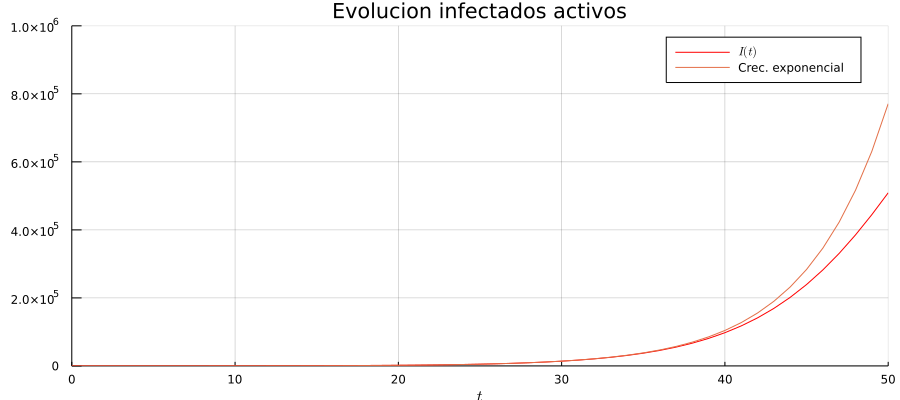

In [3]:
plot(sol,vars=2, color=:red, label=L"I(t)", xlabel=L"t", title="Evolucion infectados activos", xlims=(0,50))
plot!((0:50),UYPOP*I0*exp.((beta-gamma)*(0:50)), label="Crec. exponencial", ylims=(0,1e6))

### El número de reproducción básico $R_0$.

Observemos que, durante su infección, un individuo tiene:

* $\beta$ potenciales contagios por unidad de tiempo (suponiendo $S\approx N$).
* La infección dura un tiempo $1/\gamma$.

Entonces el número:

$$R_0 = \frac{\beta}{\gamma}$$

se interpreta como la cantidad de *contagios nuevos* que genera un individuo. Se le denomina *basic reproduction rate* en la literatura.

* Si $R_0>1$, la epidemia crece.
* si $R_0<1$, la epidemia desaparece.

### ¿Cómo podemos controlar la epidemia?

Visto lo anterior, hay dos estrategias complementarias:

* Reducir el $\beta$, es decir la tasa de contagios:
    * Reducir la movilidad y los contactos.
    * Reducir la contagiosidad (tapabocas, ventilación).
    
* Aumentar $\gamma$, es decir, achicar el tiempo en que una persona es infecciosa:

    * Rastreo, testeo y seguimiento para encuarentenar.

### Ejemplo (baja contagiosidad)

Supongamos que mediante un esfuerzo de control (restricción de movilidad) logramos bajar $\beta$ de tal manera que $R_0=1.25$.

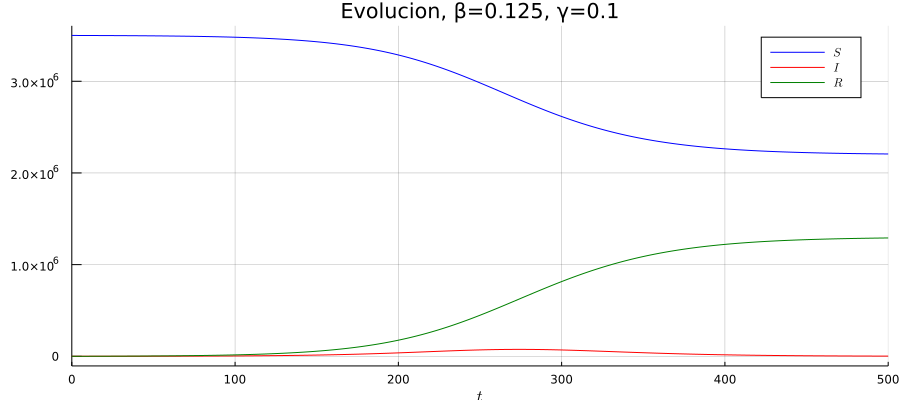

In [4]:
beta=0.125
gamma=0.1
p=[beta,gamma]
I0 = 0.0001
u0=UYPOP*[1-I0,I0,0]
Tfinal = 500.0

prob = ODEProblem(sir_model!,u0,(0,Tfinal), p)

sol=solve(prob, saveat=1)
plot(sol, label=[L"S" L"I" L"R"], color=[:blue :red :green],xlabel=L"t", title="Evolucion, β=$beta, γ=$gamma")

### Evolucion de activos

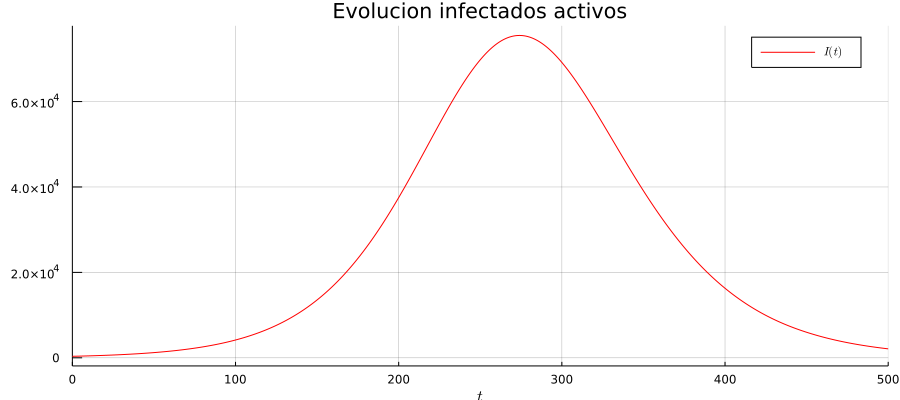

In [5]:
plot(sol,vars=2, color=:red, label=L"I(t)", xlabel=L"t", title="Evolucion infectados activos")

* La epidemia lleva más de un año en estabilizarse.
* El pico es aprox. 2% de la población. Con el mismo razonamiento se requieren $1150$ camas de CTI.
* Pero 35% de la población cursa la enfermedad, lo que implica, a la mortalidad observada, $18000$ muertes.

**Pregunta:** ¿Qué ocurre cuando volvemos a levantar las restricciones?

## Testeo, rastreo, aislamiento

El problema del modelo anterior es que es muy simple: asume que una persona enferma sigue contagiando como si nada durante toda la enfermedad.

Un modelo más adecuado sería:

![Modelo SIQR](modelo1.png)

donde las personas se infectan y al ser detectadas, se cuarentenan. Si no son detectadas, cursan la enfermedad como antes.



### Modelo con testeo y aislamiento

Se propone el modelo:

$$\begin{align*}
\dot{S} &= -\beta \frac{S}{N} I\\
\dot{I} &= \beta \frac{S}{N} I - \mu I - \gamma I\\
\dot{Q} &= \mu I - \gamma Q \\
\dot{R} &= \gamma I + \gamma Q.
\end{align*}$$

* $\beta, \gamma$ son los mismos parámetros que antes: contagiosidad y frecuencia de recuperación.
* $\mu$ es la frecuencia de testeo, o bien $1/\mu$ es cuánto tiempo demoro en detectar un infectado, rastrearlo y aislarlo.

### Ejemplo (alta contagiosidad + testeo)

Supongamos que el sistema es como al principio ($R_0=3$) pero demoramos $\approx 2$ dias en detectar infectados ($\mu = 0.5$). Tomamos $I(0) = 1$ de cada $1000$.

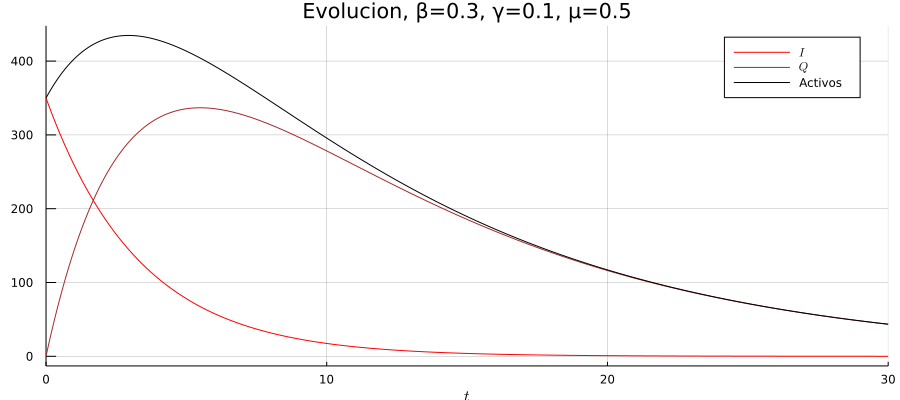

In [6]:
function sirq_model!(du,u,p,t)
    beta, gamma, mu = p
    S,I,Q,R = u
    N=S+I+Q+R
    
    du[1] = dS = -beta*S*I/N
    du[2] = dI = beta*S*I/N - (gamma+mu)*I
    du[3] = dQ = mu*I-gamma*Q
    du[4] = dR = gamma*I + gamma*Q
    
end

beta=0.3
gamma=0.1
mu=0.5
p=[beta,gamma,mu]
I0 = 0.0001
u0=UYPOP*[1-I0,I0,0,0]
Tfinal = 30.0

prob = ODEProblem(sirq_model!, u0,(0,Tfinal), p)

sol=solve(prob, saveat=.1)
plot(sol, vars=[2,3], label=[L"I" L"Q" "Activos"], color=[:red :brown], title="Evolucion, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,i,q)->(t,i+q),0,2,3), label="Activos",  xlabel=L"t", color=:black)

### La tasa de reproducción con testeo

La tasa de reproducción de este modelo puede definirse como:

$$R_\mu = \frac{\beta}{\gamma + \mu},$$

y el modelo es estable si:

$$R_\mu<1 \Leftrightarrow \beta - \gamma < \mu \Leftrightarrow \frac{1}{\mu} < \frac{1}{\beta - \gamma} = \frac{1}{\gamma}\frac{1}{R_0 - 1}$$

Dicho de otro modo, para un valor $R_0$ dado, debe cumplirse:

$$\frac{\text{Tiempo de detección}}{\text{Tiempo de contagio}} < \frac{1}{R_0-1}.$$

> **Ejemplo**: $R_0=3$, tengo que detectarlo antes de la mitad de la enfermedad.

### Ejemplo (alta contagiosidad, testeo lento)

Supongamos en cambio que $R_0=3$ pero demoramos $\approx 10$ días en detectar.

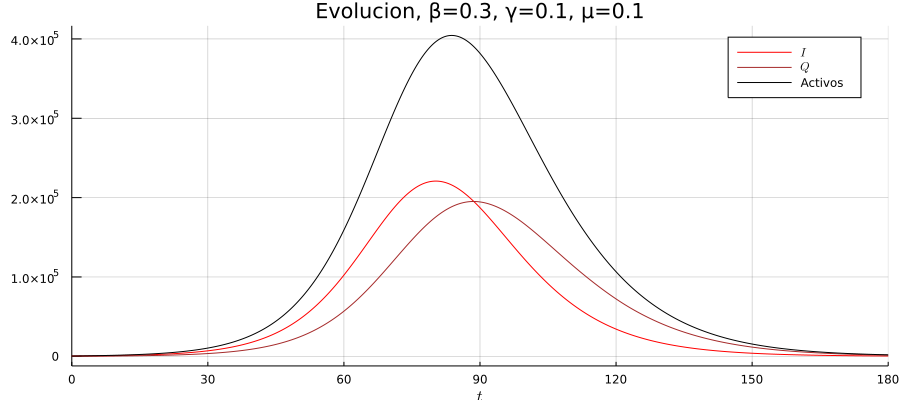

In [7]:
beta=0.3
gamma=0.1
mu=0.1
p=[beta,gamma, mu]
I0 = 0.0001
u0=UYPOP*[1-I0,I0,0,0]
Tfinal = 180.0

prob = ODEProblem(sirq_model!, u0,(0,Tfinal), p)

sol=solve(prob, saveat=.1)
plot(sol, vars=[2,3], label=[L"I" L"Q"], color=[:red :brown],  title="Evolucion, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,i,q)->(t,i+q),0,2,3), label="Activos", xlabel=L"t", color=:black)

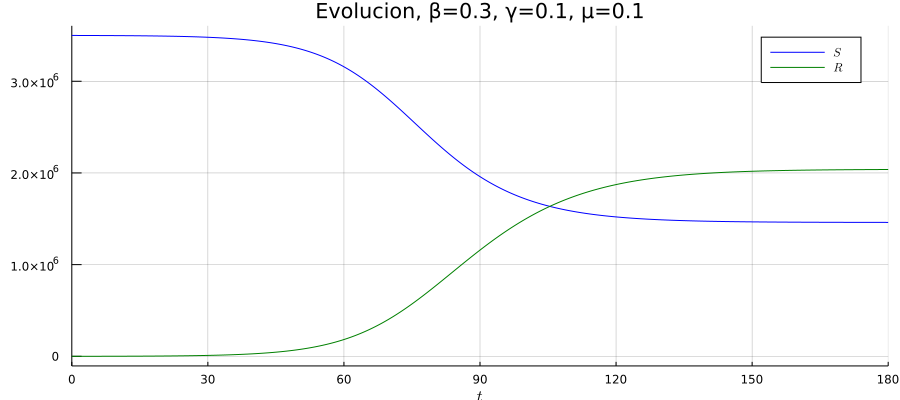

In [8]:
plot(sol, vars=[1,4], label=[L"S" L"R"], color=[:blue :green],xlabel=L"t", title="Evolucion, β=$beta, γ=$gamma, μ=$mu")


 * El pico son 400.000 personas activamente cursando (la mitad aprox. en cuarentena), un $40\%$ del caso sin testeo.
 
 * De todos modos se llega a una alta proporción de la población cursando la enfermedad.
 
 * $6000$ camas de CTI en el pico.
 

### Esfuerzo de testeo

En el modelo anterior, $\mu I$ puede interpretarse como la cantidad de test por unidad de tiempo que hacemos.

#### Ejemplo 1: alta contagiosidad, testeo rápido.

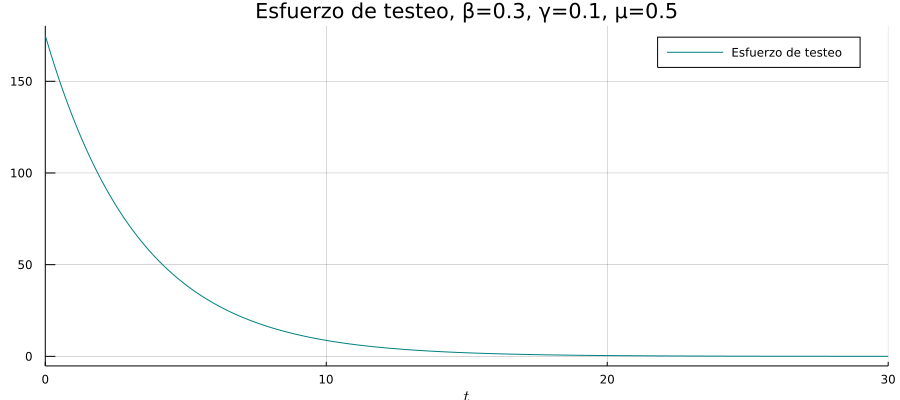

In [9]:
beta=0.3
gamma=0.1
mu=0.5
p=[beta,gamma, mu]
I0 = 0.0001
u0=[1-I0,I0,0,0]
Tfinal = 30.0

prob = ODEProblem(sirq_model!, u0,(0,Tfinal), p)

sol=solve(prob, saveat=.1)
plot(sol, vars=((t,i)->(t,mu*i*UYPOP),0,2), label="Esfuerzo de testeo", color=:teal,xlabel=L"t", title="Esfuerzo de testeo, β=$beta, γ=$gamma, μ=$mu")

#### Ejemplo 2: Alta contagiosidad, testeo lento.

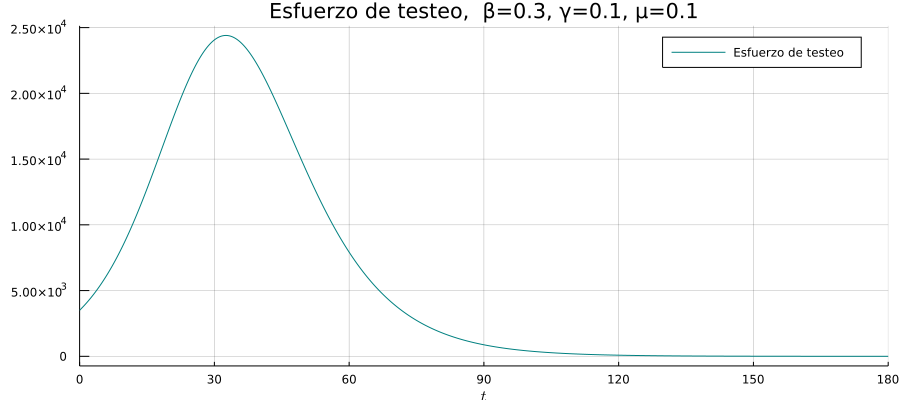

In [10]:
beta=0.3
gamma=0.1
mu=0.1
p=[beta,gamma, mu]
I0 = 0.01
u0=[1-I0,I0,0,0]
Tfinal = 180.0

prob = ODEProblem(sirq_model!, u0,(0,Tfinal), p)

sol=solve(prob, saveat=.1)
plot(sol, vars=((t,i)->(t,mu*i*UYPOP),0,2), label="Esfuerzo de testeo", color=:teal,xlabel=L"t", title="Esfuerzo de testeo,  β=$beta, γ=$gamma, μ=$mu")

* El esfuerzo de testeo requiere la realización de 25000 test positivos diarios en el pico para encuarentenar.

* A las tasas de positividad observadas, esto es simplemente insostenible.

### Deficiencias del modelo SIQR


* Analizando el modelo anterior existe una observación mayor: *el esfuerzo de testeo no puede ser infinito*. 

* Hay un límite de capacidad (testeos diarios). ¿Qué ocurre si llegamos a ese límite? ¿Se pierde el control?


## Limitación en el testeo

Volviendo al modelo $SIQR$:

![Modelo SIQR](modelo1.png)

Supongamos ahora que la tasa de rastreo es:

$$I\to Q: \quad \mu \min\{I, K\}$$.

Es decir, si tengo más de $K$ infectados, no los puedo aislar a todos inmediatamente (cola de rastreo).


### Modelo con limitación de testeo

Se propone el modelo:

$$\begin{align*}
\dot{S} &= -\beta \frac{S}{N} I\\
\dot{I} &= \beta \frac{S}{N} I - \gamma I - \color{teal}{\mu \min\{I, K\}} \\
\dot{Q} &= \color{teal}{\mu \min\{I, K\}} - \gamma Q \\
\dot{R} &= \gamma I + \gamma Q.
\end{align*}$$

* $\beta, \gamma$ son los mismos parámetros que antes: contagiosidad y frecuencia de recuperación.
* $\mu$ es la frecuencia de testeo, o bien $1/\mu$ es cuánto tiempo demoro en detectar un infectado, rastrearlo y aislarlo.
* $K$ es el límite de testeo

### Ejemplo (alta contagiosidad, testeo rápido)

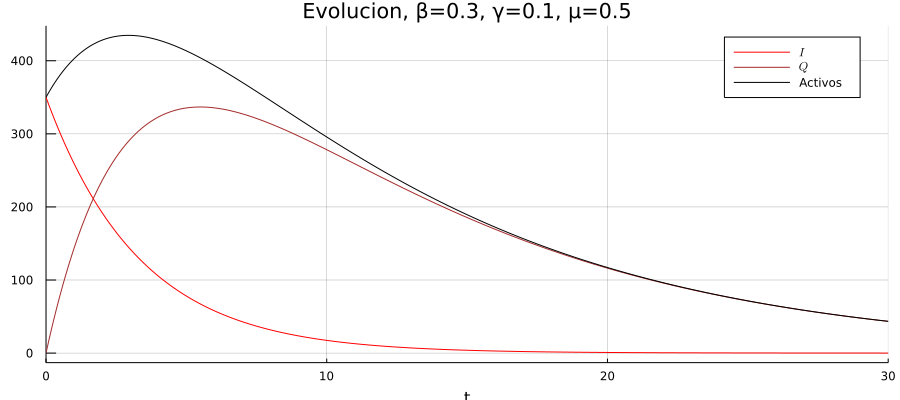

In [11]:
function sirq_limited_model!(du,u,p,t)
    beta, gamma, mu, K = p
    S,I,Q,R = u
    N=S+I+Q+R
    
    du[1] = dS = -beta*S*I/N
    du[2] = dI = beta*S*I/N - gamma*I - mu*min(K,I)
    du[3] = dQ = mu*min(K,I)-gamma*Q
    du[4] = dR = gamma*I + gamma*Q
    
end

beta=0.3
gamma=0.1
mu=0.5
K = 4000.0
p=[beta,gamma,mu, K]
I0 = 0.0001
u0=UYPOP*[1-I0,I0,0,0]
Tfinal = 30.0

prob = ODEProblem(sirq_limited_model!, u0,(0,Tfinal), p)

sol=solve(prob, saveat=.1)
plot(sol, vars=[2,3], label=[L"I" L"Q" "Activos"], color=[:red :brown],xlabel=L"t", title="Evolucion, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,i,q)->(t,i+q),0,2,3), label="Activos", color=:black)

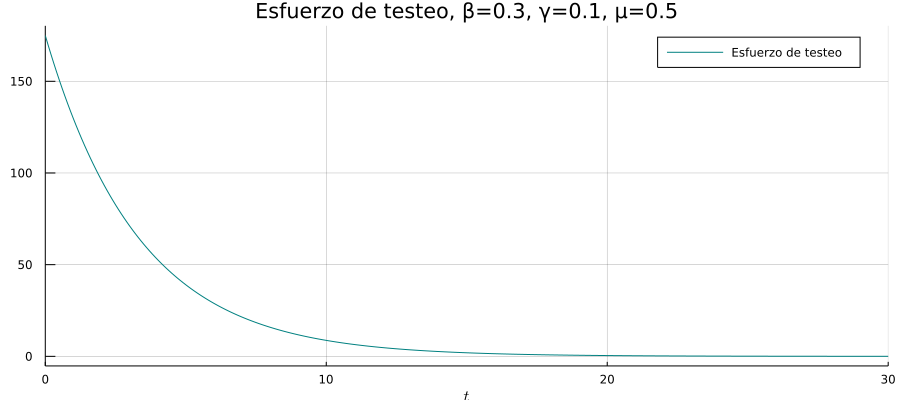

In [12]:
plot(sol, vars=((t,i)->(t,mu*min(i,K)),0,2), label="Esfuerzo de testeo", color=:teal,xlabel=L"t", title="Esfuerzo de testeo, β=$beta, γ=$gamma, μ=$mu")

### Ejemplo (alta contagiosidad, testeo lento)

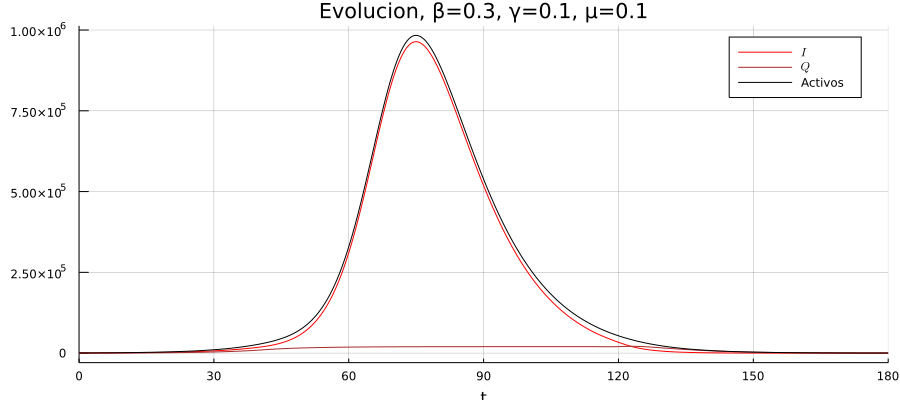

In [13]:
beta=0.3
gamma=0.1
mu=0.1
K = 20000.0
p=[beta,gamma,mu, K]
I0 = 0.0001
u0=UYPOP*[1-I0,I0,0,0]
Tfinal = 180.0

prob = ODEProblem(sirq_limited_model!, u0,(0,Tfinal), p)

sol=solve(prob, saveat=.1)
plot(sol, vars=[2,3], label=[L"I" L"Q" "Activos"], color=[:red :brown],xlabel=L"t", title="Evolucion, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,i,q)->(t,i+q),0,2,3), label="Activos", color=:black)

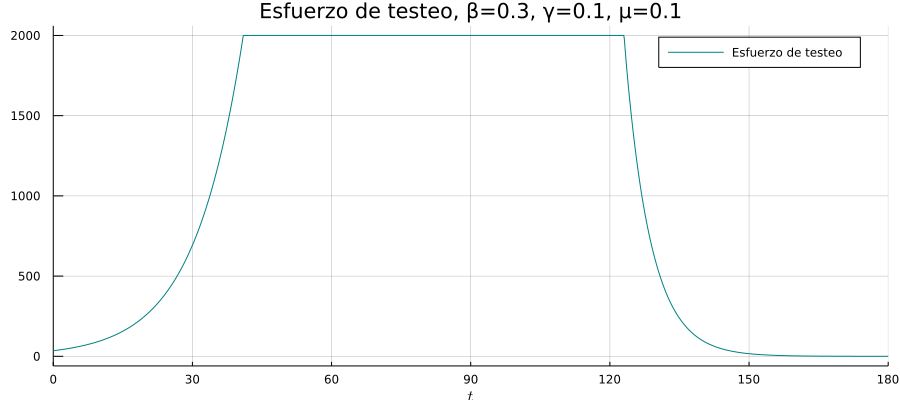

In [14]:
plot(sol, vars=((t,i)->(t,mu*min(i,K)),0,2), label="Esfuerzo de testeo", color=:teal,xlabel=L"t", title="Esfuerzo de testeo, β=$beta, γ=$gamma, μ=$mu")

* Si el sistema de testeo se satura, volvemos a la situación de epidemia descontrolada.

* El esfuerzo de testeo no ayuda a contener la epidemia. La proporción efectivamente en cuarentena es mínima.

* El **retardo de detección** es clave: un sistema que detecta rápido puede operar sin saturar por más tiempo. 

### El rol de la saturación.

Supongamos como antes que en el modelo anterior $S\approx N$ (al comienzo de la epidemia) y que:

$$R_0 = \frac{\beta}{\gamma}> 1, \quad \quad R_\mu = \frac{\beta}{\mu+\gamma}<1.$$

* Si no hacemos nada la epidemia se expande.

* Si hacemos rastreo la epidemia se controla.


**Pregunta:** ¿Qué rol cumple la saturación?

### Análisis lineal

La ecuación anterior se simplifica a:

$$\dot{I} = \beta I - \gamma I - \mu \min\{I, K\}.$$

Nuevamente es una ecuación lineal con un término de saturación:

![diagrama de fase](umbral.png)

### Umbral de estabilidad

El umbral $I^*$ se calcula como:

$$\beta I^* - \gamma I^* - \mu K =0 \Leftrightarrow I^* = \frac{\mu K}{\beta - \gamma}.$$

>**Problema:** 
>
> Si por alguna razón la cantidad de infectados supera el umbral, la epidemia pasa de una fase de **control**  a una de **crecimiento exponencial**.

### Ejemplo:

Parámetros: $\beta = 0.3, \gamma = 0.1, \mu=0.5, K=4000 \Rightarrow I^*=10000$

#### Caso 1: $I(0)=9500$.

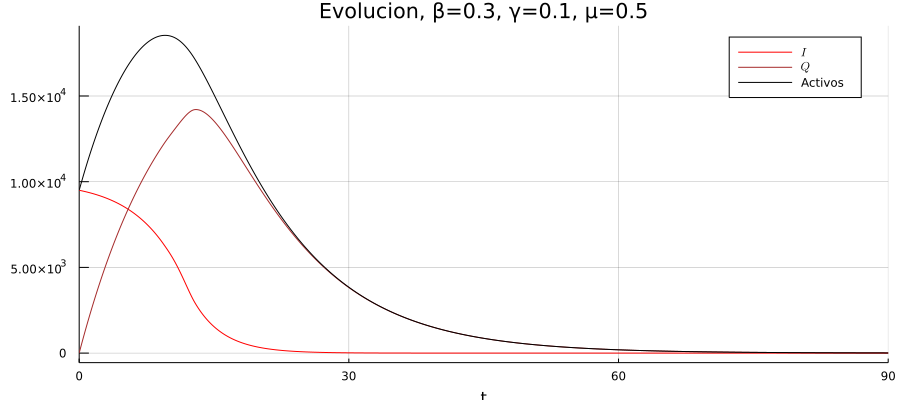

In [15]:
beta=0.3
gamma=0.1
mu=0.5
K = 4000.0
p=[beta,gamma,mu, K]

I0 = 9500
u0 = [UYPOP-I0,I0,0,0]
Tfinal = 90.0

prob1 = ODEProblem(sirq_limited_model!, u0,(0,Tfinal), p)

I0 = 10500
u0 = [UYPOP-I0,I0,0,0]
Tfinal = 90.0

prob2 = ODEProblem(sirq_limited_model!, u0,(0,Tfinal), p)

sol1=solve(prob1, saveat=.1)
sol2=solve(prob2, saveat=.1)

plot(sol1, vars=[2,3], label=[L"I" L"Q" "Activos"], color=[:red :brown],xlabel=L"t", title="Evolucion, β=$beta, γ=$gamma, μ=$mu")
plot!(sol1, vars=((t,i,q)->(t,i+q),0,2,3), label="Activos", color=:black)

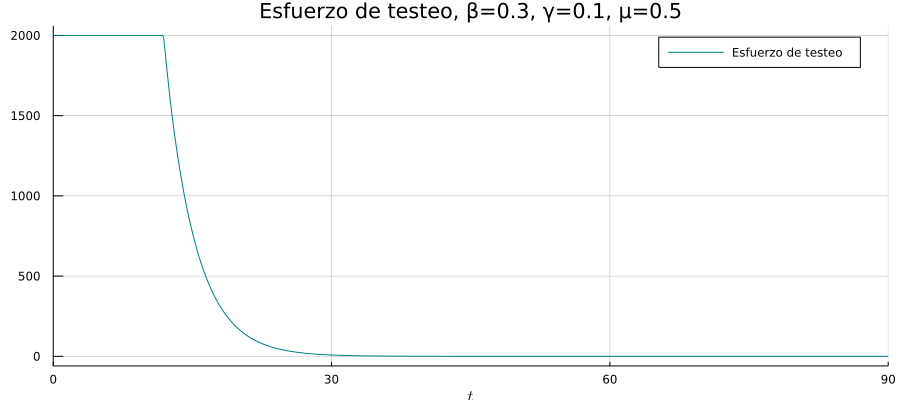

In [16]:
plot(sol1, vars=((t,i)->(t,mu*min(i,K)),0,2), label="Esfuerzo de testeo", color=:teal,xlabel=L"t", title="Esfuerzo de testeo, β=$beta, γ=$gamma, μ=$mu")

#### Caso 1: $I(0)=10100$.

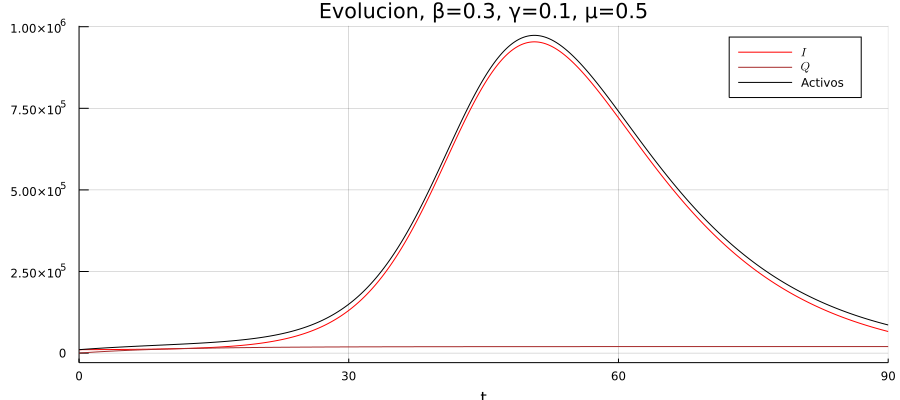

In [17]:
plot(sol2, vars=[2,3], label=[L"I" L"Q" "Activos"], color=[:red :brown],xlabel=L"t", title="Evolucion, β=$beta, γ=$gamma, μ=$mu")
plot!(sol2, vars=((t,i,q)->(t,i+q),0,2,3), label="Activos", color=:black)

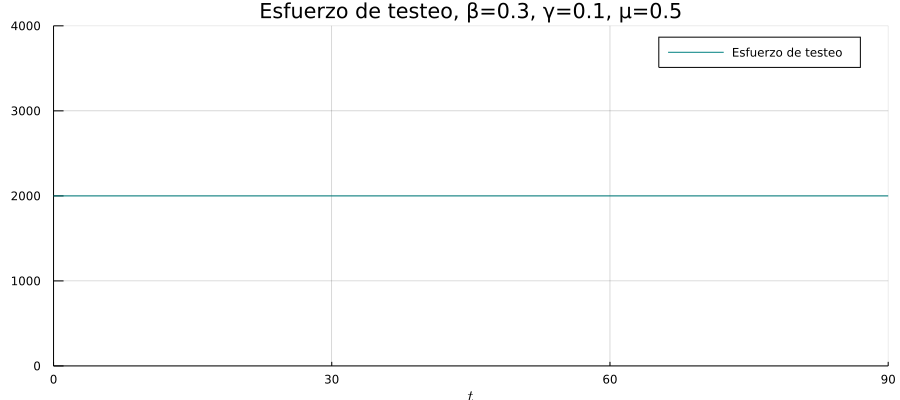

In [18]:
plot(sol2, vars=((t,i)->(t,mu*min(i,K)),0,2), label="Esfuerzo de testeo", color=:teal,xlabel=L"t", title="Esfuerzo de testeo, β=$beta, γ=$gamma, μ=$mu", ylims=(0,4000))

### Conclusiones del modelo SIQR+saturación

* Existe espacio para mantener el control de la epidemia mediante TETRIS.

* El sistema puede operar de manera estable con períodos cortos de saturación de testeo.

* Existe un umbral donde el esfuerzo de testeo es simplemente no suficiente y la epidemia se dispara.


* **Problema:**  El esfuerzo de testeo en el modelo anterior solo tiene en cuenta los *positivos* infectados, no el rastreo de contactos y el conjunto de tests que tengo que realizar para ir haciendo screening de la población.

## Modelo TETRIS completo

Para mejorar lo anterior, proponemos el siguiente modelo para el TETRIS:


![modelo 2](modelo2.png)


* $S,I,Q,R$ como antes.
* $P:$ nuevo compartimento:representa a los *contactos* de infectados (potenciales contagios) que *no van a desarrollar la enfermedad* pero por ser sospechosos, voy a tener que testearlos

### Parámetros:

* $\beta$: como antes, tasa de contactos que provocan contagios.
* $\nu$: contactos potenciales generados por cada contagio.
* $\mu$: frecuencia de testeo/rastreo/aislamiento.
* $\gamma$: frecuencia de recuperacióm.

### Dinámica

La dinámica completa queda:

$$\begin{align*}
\dot{S} &= -\beta \frac{S}{N} I - \nu\beta \frac{S}{N} I + \mu P\\
\dot{P} &= \nu\beta \frac{S}{N} I - \beta \frac{P}{N} I - \mu P\\
\dot{I} &= \beta \frac{S+P}{N} I - \gamma I - \mu I \\
\dot{Q} &= \mu I - \gamma Q \\
\dot{R} &= \gamma I + \gamma Q.
\end{align*}$$

* $S+P$ opera como población de susceptibles, pero permite distinguir aquellos que serán testeados.

* El *esfuerzo de testeo* es $\mu(I+P)$.

### Análisis

Desde el punto de vista de la *estabilidad* el modelo no cambia (los susceptibles son $S+P$) y las tasas de reprodución son:

$$R_0 = \frac{\beta}{\gamma}, \quad \quad R_\mu = \frac{\beta}{\mu + \gamma}.$$

Y el sistema es estable con $R_0>1$ si $R_\mu <1$.

### Ejemplo (alta contagiosidad, testeo rápido)

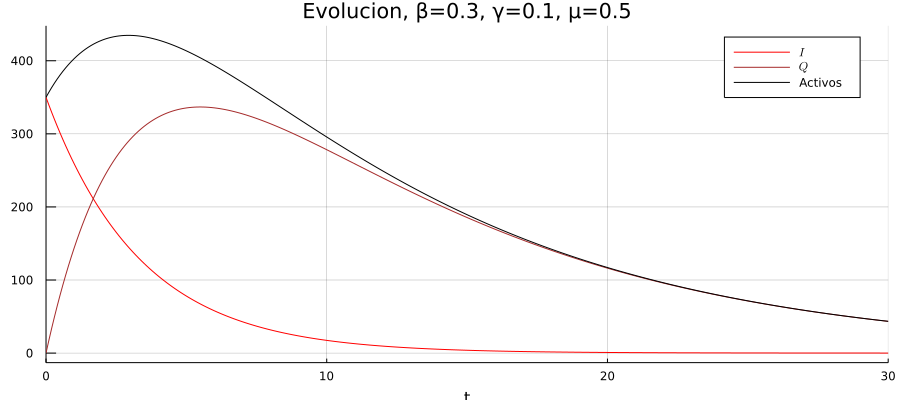

In [19]:
function spirq_model!(du,u,p,t)
    beta, gamma, mu, nu = p
    S,P,I,Q,R = u
    N=S+P+I+Q+R
    
    du[1] = dS = -beta*S*I/N - nu*beta*S*I/N + mu*P
    du[2] = dP = nu*beta*S*I/N - beta*P*I/N - mu*P
    du[3] = dI = beta*(S+P)*I/N - gamma*I - mu*I
    du[4] = dQ = mu*I-gamma*Q
    du[5] = dR = gamma*I + gamma*Q
    
end

beta=0.3
gamma=0.1
mu=0.5
nu = 9.0
p=[beta,gamma,mu, nu]
I0 = 0.0001
u0=UYPOP*[1-I0,0,I0,0,0]
Tfinal = 30.0

prob = ODEProblem(spirq_model!, u0,(0,Tfinal), p)

sol=solve(prob, saveat=.1)
plot(sol, vars=[3,4], label=[L"I" L"Q" "Activos"], color=[:red :brown],xlabel=L"t", title="Evolucion, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,i,q)->(t,i+q),0,3,4), label="Activos", color=:black)

### Esfuerzo de testeo:

La evolución no cambia, pero puedo evaluar el *esfuerzo total de testeo*.

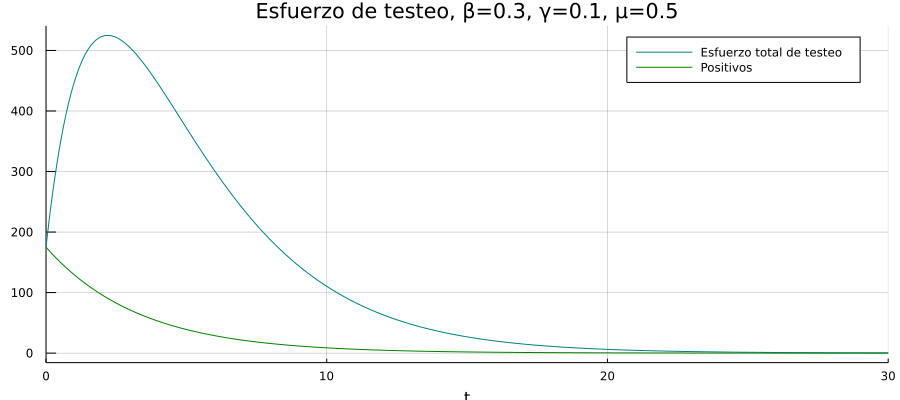

In [20]:
plot(sol, vars=((t,p,i)->(t,mu*(p+i)),0,2,3), label="Esfuerzo total de testeo", color=:teal,xlabel=L"t", title="Esfuerzo de testeo, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,i)->(t,mu*i),0,3), label="Positivos", color=:green)

## Modelo TETRIS con saturación

Retomemos el modelo:

![modelo 2](modelo2.png)


Pero ahora agreguemos una saturación, es decir, un máximo nivel de testeo diario **total**.

* Si $P+I<K$, puedo testear a todos, el modelo es como antes.
* Si $P+I>K$, solo puedo testear a $K$ simultáneamente, y los repartimos entre $I$ y $P$ proporcionalmente:

$$I \to Q: \mu K \frac{I}{P+I}, \quad \quad P \to S: \mu K \frac{P}{P+I}.$$

### Dinámica

La dinámica completa queda:

$$\begin{align*}
\dot{S} &= -\beta \frac{S}{N} I - \nu\beta \frac{S}{N} I + \color{teal}{\mu \frac{P}{P+I}\min\{K,P+I\}} \\
\dot{P} &= \nu\beta \frac{S}{N} I - \beta \frac{P}{N} I - \color{teal}{\mu \frac{P}{P+I}\min\{K,P+I\}}\\
\dot{I} &= \beta \frac{S+P}{N} I - \gamma I - \color{teal}{\mu \frac{I}{P+I}\min\{K,P+I\}} \\
\dot{Q} &= \color{teal}{\mu \frac{I}{P+I}\min\{K,P+I\}} - \gamma Q \\
\dot{R} &= \gamma I + \gamma Q.
\end{align*}$$

## Ejemplo de aplicación

Apliquemos este último modelo con parámetros similares a los observados en Uruguay:

 * Tasa de contagiosidad: $\beta \approx 1.5$ debido a las medidas no farmacológicas.
 * Tasa de contactos a rastrear por positivo: $\nu = 9$.
 * Duración de la enfermedad: $1/\gamma = 10$ días.
 * Demora en la realización de test: $1/\mu = 2$ días.
 * Máximo esfuerzo de testeo: $\mu K = 15000$ test diarios.

### Evolución:

Tomemos $I(0)=3500$ infectados iniciales y sin contactos.

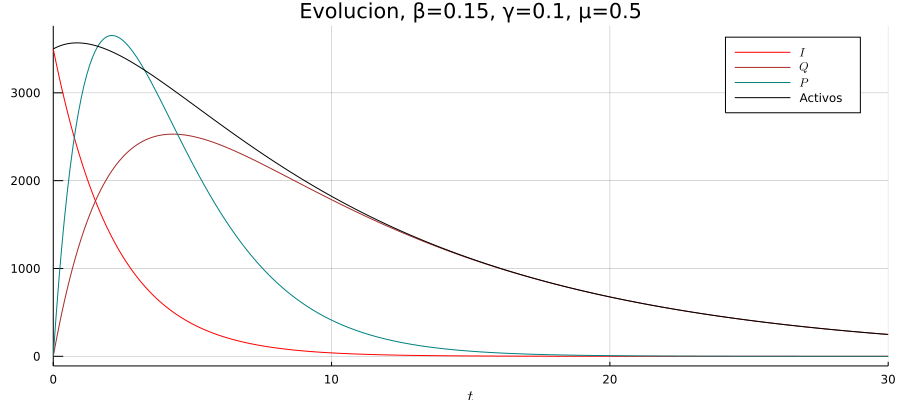

In [21]:
function spirq_model_saturated!(du,u,p,t)
    beta, gamma, mu, nu, K = p
    S,P,I,Q,R = u
    N=S+P+I+Q+R
    
    du[1] = dS = -beta*S*I/N - nu*beta*S*I/N + mu*P/(P+I) * min(K,P+I)
    du[2] = dP = nu*beta*S*I/N - beta*P*I/N - mu*P/(P+I) * min(K,P+I)
    du[3] = dI = beta*(S+P)*I/N - gamma*I - mu*I/(P+I) * min(K,P+I)
    du[4] = dQ = mu*I/(P+I) * min(K,P+I)-gamma*Q
    du[5] = dR = gamma*I + gamma*Q
    
end

beta=0.15
gamma=0.1
mu=0.5
nu = 9.0
K=30000

p=[beta,gamma,mu, nu, K]

I0 = 0.001
u0=UYPOP*[1-I0,0,I0,0,0]
Tfinal = 30.0

prob = ODEProblem(spirq_model_saturated!, u0,(0,Tfinal), p)

sol=solve(prob, saveat=.1)
plot(sol, vars=[3,4,2], label=[L"I" L"Q" L"P"], color=[:red :brown :teal], title="Evolucion, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,i,q)->(t,i+q),0,3,4), label="Activos", xlabel=L"t", color=:black)

### Esfuerzo de testeo:

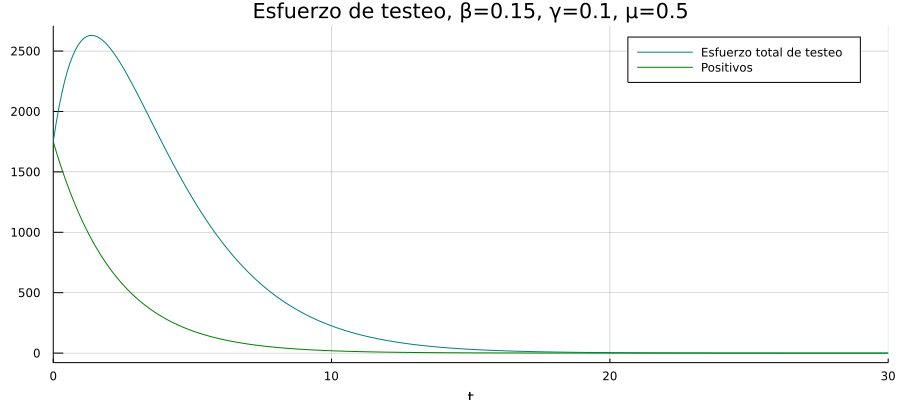

In [22]:
plot(sol, vars=((t,p,i)->(t,mu*min(K,p+i)),0,2,3), label="Esfuerzo total de testeo", color=:teal,xlabel=L"t", title="Esfuerzo de testeo, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,p,i)->(t,mu*i/(p+i)*min(K,p+i)),0,2,3), label="Positivos", color=:green)

### Ejemplo más realista:

Tomemos condición inicial $I(0)=3500$ infectados pero $9$ potenciales contactos por cada uno.

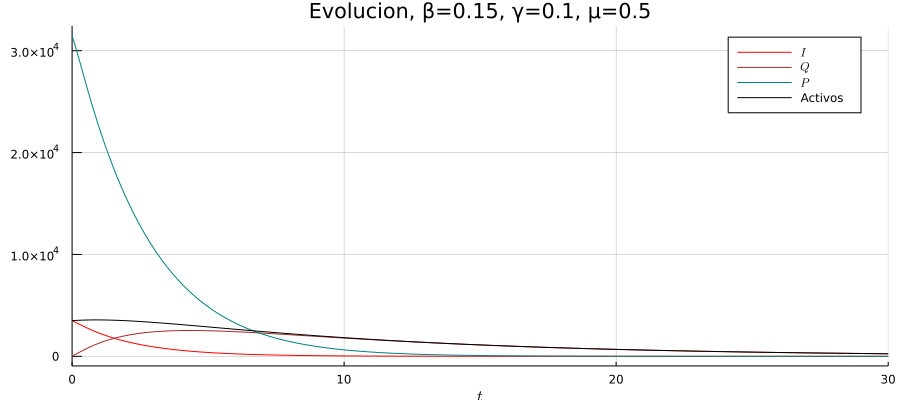

In [23]:
beta=0.15
gamma=0.1
mu=0.5
nu = 9.0
K=30000

p=[beta,gamma,mu, nu, K]

I0 = 0.001
P0 = nu*I0
u0=UYPOP*[1-I0-P0,P0,I0,0,0]
Tfinal = 30.0

prob = ODEProblem(spirq_model_saturated!, u0,(0,Tfinal), p)

sol=solve(prob, saveat=.1)
plot(sol, vars=[3,4,2], label=[L"I" L"Q" L"P"], color=[:red :brown :teal], title="Evolucion, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,i,q)->(t,i+q),0,3,4), label="Activos", xlabel=L"t", color=:black)

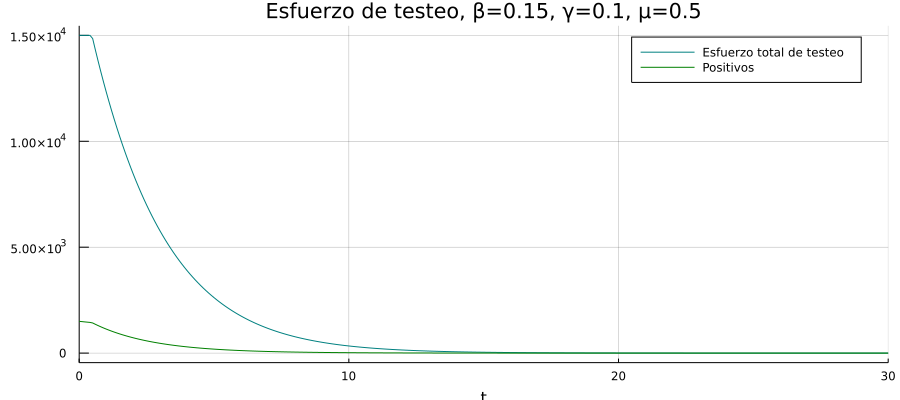

In [24]:
plot(sol, vars=((t,p,i)->(t,mu*min((p+i),K)),0,2,3), label="Esfuerzo total de testeo", color=:teal,xlabel=L"t", title="Esfuerzo de testeo, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,p,i)->(t,mu*i/(p+i)*min(K,p+i)),0,2,3), label="Positivos", color=:green)

### Ejemplo:

Tomemos una condición inicial más alta $I(0)=21000$ infectados y $9$ potenciales contactos.

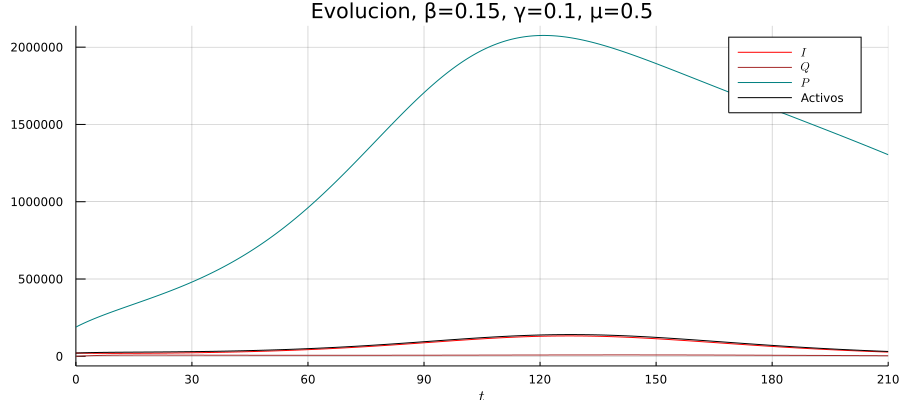

In [25]:
beta=0.15
gamma=0.1
mu=0.5
nu = 9.0
K=30000

p=[beta,gamma,mu, nu, K]

I0 = 0.006
P0 = nu*I0
u0=UYPOP*[1-I0-P0,P0,I0,0,0]
Tfinal = 210.0
prob = ODEProblem(spirq_model_saturated!, u0,(0,Tfinal), p)

sol=solve(prob, saveat=.1)
plot(sol, vars=[3,4,2], label=[L"I" L"Q" L"P"], color=[:red :brown :teal], title="Evolucion, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,i,q)->(t,i+q),0,3,4), label="Activos", xlabel=L"t", color=:black, yformatter=:plain)

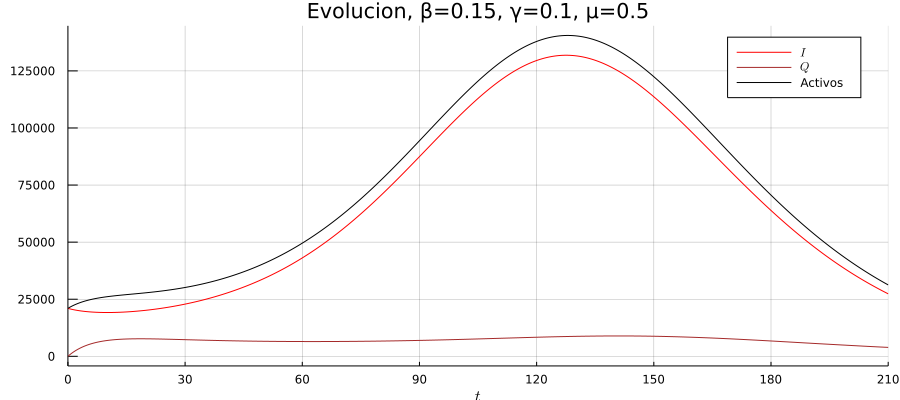

In [26]:
plot(sol, vars=[3,4], label=[L"I" L"Q"], color=[:red :brown], title="Evolucion, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,i,q)->(t,i+q),0,3,4), label="Activos", xlabel=L"t", color=:black, yformatter=:plain)

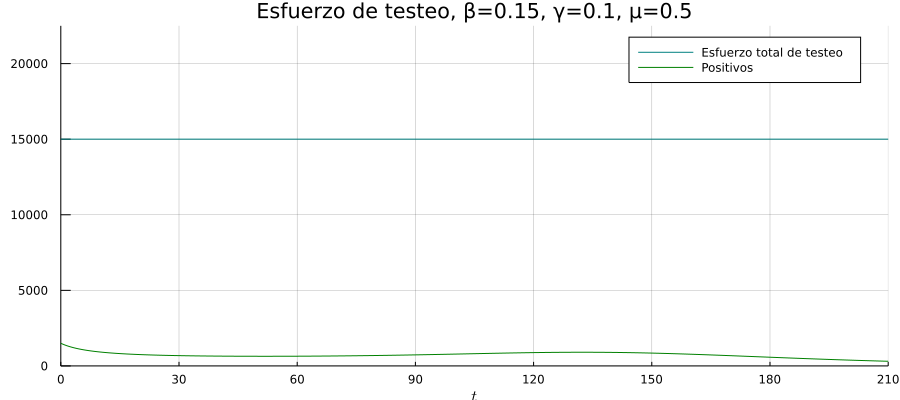

In [27]:
plot(sol, vars=((t,p,i)->(t,mu*min((p+i),K)),0,2,3), label="Esfuerzo total de testeo", color=:teal, title="Esfuerzo de testeo, β=$beta, γ=$gamma, μ=$mu")
plot!(sol, vars=((t,p,i)->(t,mu*i/(p+i)*min(K,p+i)),0,2,3), label="Positivos", color=:green,xlabel=L"t", yformatter=:plain, ylims=(0,1.5*mu*K))

## Conclusiones

* Los modelos compartimentales pueden ajustarse para capturar las medidas de *mitigación*.


* El testeo - rastreo - aislamiento vuelve controlable una epidemia "descontrolada" siempre que sea suficientemente rápido aislando casos.


* Las medidas no farmacológicas (reducción del $\beta$) amplían el margen para el testeo.


* La presencia de saturaciones introduce un nuevo fenómeno *bifásico*:

   * La epidemia está controlada buena parte del tiempo.
   
   * Una vez que se supera un umbral, se pierde el control. El Tetris hace poca fuerza (pero no nula).